In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
execfile('../../matplotlibrc.py')

In [22]:
filenames = ['4L', '2Q0.5', '2Q0.3', '4Q']
labels = ['4L', '2Q(1/2)', '2Q(1/3)', '4Q(1/2)']
colors = ['b', 'g', 'r', 'm']

In [23]:
control_points = np.array([0, 0.1250, 0.1666, 0.2500, 0.3750, 0.5, 0.6250, 0.6666, 0.7500, 0.8750, 1.0])

In [24]:
def uex(x):
    return 2*np.cos(x) + x**2 - (2*np.cos(1) - 1)/np.sin(1)*np.sin(x) - 2

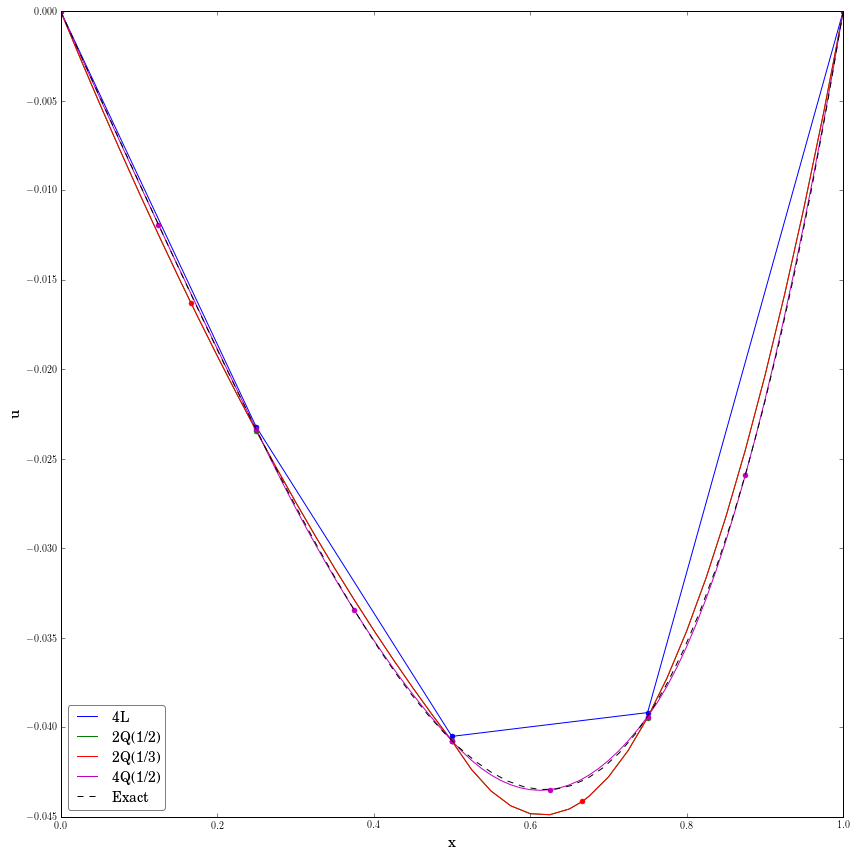

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))
MS = 10
UU = np.ones((len(control_points), len(filenames)+1))
for i, (filename, label, color) in enumerate(zip(filenames, labels, colors)):
    x, U = np.genfromtxt(filename, unpack=True, delimiter=',')
    ax.plot(x, U, label=label, color=color)
    for j in range(len(control_points)):
        idx = (np.abs(x - control_points[j]) <= 1e-3).argmax()
        UU[j,i] = U[idx]
    x, U = np.genfromtxt(filename+'x', unpack=True, delimiter=',')
    ax.plot(x, U, '.', color=color, ms=10)

# Exact
x = np.linspace(0, 1)
ax.plot(x, uex(x), 'k--', label='Exact')
UU[:,-1] = uex(control_points)
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('u')
fig.tight_layout()
fig.savefig('tex/q3.pdf')
plt.show()

In [43]:
tablehead = r'''\begin{tabular}{ c c cccc c c}
    \toprule
    & \pa & \multicolumn{4}{c}{FEM Solution} & \pa & Exact\\
    \cmidrule{3-6}
    x & & 4L & 2Q $(\alpha = 1/2)$ & 2Q $(\alpha = 1/3)$ & 4Q $(\alpha = 1/2)$ & &\\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}'''
lines = []
fmt = '%9.6f'
for x, row in zip(control_points, UU):
    middle = ' & '.join([fmt%u for u in row[:-1]])
    ex = fmt%row[-1]
    
    line = ' & & '.join([fmt%x, middle, ex])
    lines.append(line)
lines.append('')
body = '\\\\ \n'.join(lines)
table = '\n'.join([tablehead, body, tablefoot])
print(table)

\begin{tabular}{ c c cccc c c}
    \toprule
    & \pa & \multicolumn{4}{c}{FEM Solution} & \pa & Exact\\
    \cmidrule{3-6}
    x & & 4L & 2Q $(\alpha = 1/2)$ & 2Q $(\alpha = 1/3)$ & 4Q $(\alpha = 1/2)$ & &\\
    \midrule

 0.000000 & &  0.000000 &  0.000000 &  0.000000 &  0.000000 & &  0.000000\\ 
 0.125000 & & -0.011617 & -0.012488 & -0.012488 & -0.011927 & & -0.011922\\ 
 0.166600 & & -0.015483 & -0.016305 & -0.016305 & -0.015790 & & -0.015821\\ 
 0.250000 & & -0.023233 & -0.023447 & -0.023447 & -0.023375 & & -0.023374\\ 
 0.375000 & & -0.031876 & -0.032877 & -0.032877 & -0.033450 & & -0.033445\\ 
 0.500000 & & -0.040519 & -0.040779 & -0.040779 & -0.040760 & & -0.040759\\ 
 0.625000 & & -0.039855 & -0.044897 & -0.044897 & -0.043500 & & -0.043495\\ 
 0.666600 & & -0.039637 & -0.044169 & -0.044169 & -0.042912 & & -0.043016\\ 
 0.750000 & & -0.039191 & -0.039473 & -0.039473 & -0.039417 & & -0.039417\\ 
 0.875000 & & -0.019595 & -0.024507 & -0.024507 & -0.025907 & & -0.025904\\ 
 1.0000

In [46]:
open('tex/table.tex', 'w').write(table)